In [1]:
# Get the data here: https://data.world/dataquest/mlb-game-logs
import sys, os
sys.path.insert(0, os.path.abspath("../.."))
%load_ext ElasticNotebook

In [2]:
%%RecordEvent
import pandas as pd
gl = pd.read_csv('data/game_logs.csv')
gl.head()

/var/folders/t9/7bppp22j4nq50851rm2rb7780000gn/T/ipykernel_69864/2618778439.py:2: DtypeWarning: Columns (12,13,14,15,19,20,81,83,85,87,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types. Specify dtype option on import or set low_memory=False.
  gl = pd.read_csv('data/game_logs.csv')


,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,18710506,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,18710508,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,18710509,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y


In [3]:
%%RecordEvent
gl.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Columns: 161 entries, date to acquisition_info
dtypes: float64(77), int64(6), object(78)
memory usage: 859.4 MB


In [4]:
%%RecordEvent
for dtype in ['float','int','object']:
    selected_dtype = gl.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 1.29 MB
Average memory usage for int columns: 1.12 MB
Average memory usage for object columns: 9.50 MB


In [5]:
%%RecordEvent
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [6]:
%%RecordEvent
gl_int = gl.select_dtypes(include=['int'])
converted_int = gl_int.apply(pd.to_numeric,downcast='unsigned')
print(mem_usage(gl_int))
print(mem_usage(converted_int))
compare_ints = pd.concat([gl_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

7.87 MB
1.48 MB


,before,after
uint8,NaN,5.0
uint32,NaN,1.0
int64,6.0,NaN


In [7]:
%%RecordEvent
gl_float = gl.select_dtypes(include=['float'])
converted_float = gl_float.apply(pd.to_numeric,downcast='float')
print(mem_usage(gl_float))
print(mem_usage(converted_float))
compare_floats = pd.concat([gl_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

100.99 MB
50.49 MB


,before,after
float32,NaN,77.0
float64,77.0,NaN


In [8]:
%%RecordEvent
optimized_gl = gl.copy()
optimized_gl[converted_int.columns] = converted_int
optimized_gl[converted_float.columns] = converted_float

print(mem_usage(gl))
print(mem_usage(optimized_gl))

859.43 MB
802.54 MB


In [9]:
%%RecordEvent
gl_obj = gl.select_dtypes(include=['object']).copy()
gl_obj.describe()

,day_of_week,v_name,v_league,h_name,h_league,day_night,completion,forefeit,protest,park_id,...,h_player_6_id,h_player_6_name,h_player_7_id,h_player_7_name,h_player_8_id,h_player_8_name,h_player_9_id,h_player_9_name,additional_info,acquisition_info
count,171907,171907,171907,171907,171907,140150,116,145,180,171907,...,140838,140838,140838,140838,140838,140838,140838,140838,1456,140841
unique,7,148,7,148,7,2,116,3,5,245,...,4774,4720,5253,5197,4760,4710,5193,5142,332,1
top,Sat,CHN,NL,CHN,NL,D,"19200904,,0,6,36",H,V,STL07,...,grimc101,Charlie Grimm,grimc101,Charlie Grimm,lopea102,Al Lopez,spahw101,Warren Spahn,HTBF,Y
freq,28891,8870,88866,9024,88867,82724,1,69,90,7022,...,427,427,491,491,676,676,339,339,1112,140841


In [10]:
%%RecordEvent
dow = gl_obj.day_of_week
print(dow.head())
dow_cat = dow.astype('category')
print(dow_cat.head())

0    Thu
1    Fri
2    Sat
3    Mon
4    Tue
Name: day_of_week, dtype: object
0    Thu
1    Fri
2    Sat
3    Mon
4    Tue
Name: day_of_week, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']


In [11]:
%%RecordEvent
converted_obj = pd.DataFrame()
for col in gl_obj.columns:
    num_unique_values = len(gl_obj[col].unique())
    num_total_values = len(gl_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = gl_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = gl_obj[col]

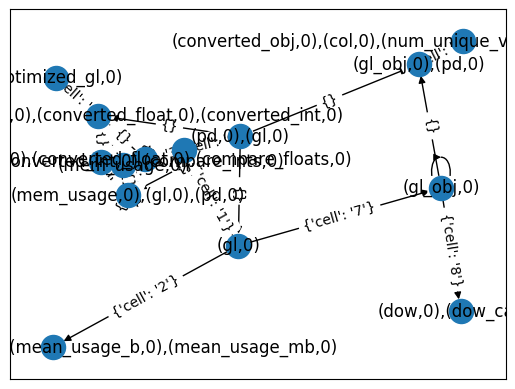

In [12]:
%Inspect

In [13]:
%Checkpoint checkpoints/pandas.pickle


---------------------------
variables to migrate:
---------------------------
variables to recompute:
mean_usage_mb 32
gl 901174675
num_total_values 28
compare_ints 1836
gl_int 8251680
converted_float 52947500
optimized_gl 841522946
col 65
compare_floats 23632
dow_cat 172771
gl_float 105894856
selected_dtype 787028427
converted_int 1547307
num_unique_values 28
mem_usage 136
dow 10314564
mean_usage_b 32
converted_obj 52313108
gl_obj 787028427
dtype 55
pd 72
---------------------------
OEs to recompute:
5 0.03537893295288086
6 1.862914800643921
7 0.8145530223846436
9 1.1658270359039307
8 0.006003856658935547
2 0.6856310367584229
3 0.0005071163177490234
0 1.9222021102905273
4 0.021792888641357422
Checkpoint saved to: checkpoints/pandas.pickle
